# 7.3 Ridge Regression

### Setup

In [1]:
%matplotlib inline

In [2]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge

In [3]:
warnings.simplefilter("ignore")

Load data

In [4]:
diabetes = pd.read_csv("../data/diabetes.csv")

In [5]:
diabetes.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,prog
0,59,1,32.1,101.0,157,93.2,38.0,4.0,2.11,87,151
1,48,0,21.6,87.0,183,103.2,70.0,3.0,1.69,69,75
2,72,1,30.5,93.0,156,93.6,41.0,4.0,2.03,85,141
3,24,0,25.3,84.0,198,131.4,40.0,5.0,2.12,89,206
4,50,0,23.0,101.0,192,125.4,52.0,4.0,1.86,80,135


Standardize the data

In [6]:
x_columns = [col for col in diabetes.columns if col != "prog"]

In [7]:
n_cases = diabetes.shape[0]

diabetes_norm = pd.DataFrame(
    {
        col: (diabetes[col] - diabetes[col].mean()) / np.sqrt((n_cases - 1) * diabetes[col].var())
        for col in x_columns
    }
)
diabetes_norm["prog"] = diabetes["prog"] - diabetes["prog"].mean()

### Ridge regression paths

In [8]:
alpha_vals = [i * 1.0 / 100 for i in range(0, 26)]

In [9]:
skl_model = Ridge(alpha=0.0, fit_intercept=False)
skl_model.fit(diabetes_norm[x_columns], diabetes_norm.prog)

Ridge(alpha=0.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [10]:
paths = np.zeros((len(x_columns), len(alpha_vals)))
for i, alpha in enumerate(alpha_vals):
    model = Ridge(alpha=alpha, fit_intercept=False)
    model.fit(diabetes_norm[x_columns], diabetes_norm.prog)
    paths[:, i] = model.coef_

### Figure 7.2

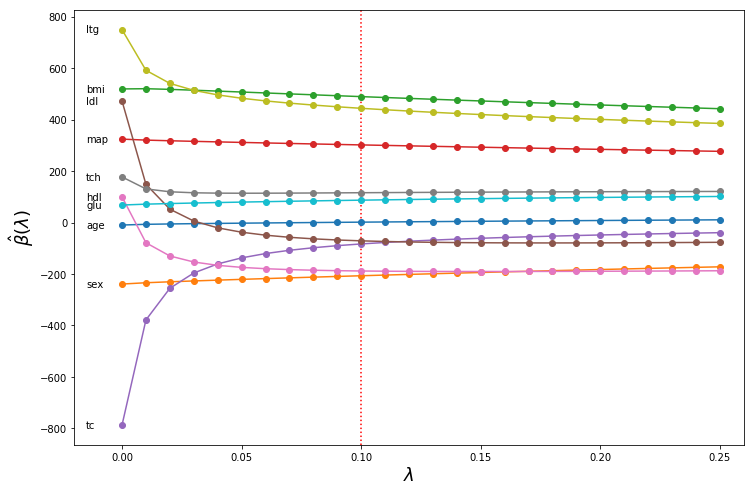

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.axvline(0.10, c="r", linestyle=":")

for column, line in zip(x_columns, paths):
    ax.plot(alpha_vals, line, "o-")
    ax.text(-0.015, line[0], column, verticalalignment="center")

ax.set_xlabel(r"$\lambda$", size=18)
ax.set_ylabel(r"$\hat{\beta}(\lambda)$", size=18)

ax.set_xlim(-0.02, 0.26);

### Table 7.3

Standard deviation values are excluded because of homework exercise 7.7a

Get coefficients for OLS

In [12]:
formula = "prog ~ " + " + ".join(x_columns) + " -1"
sm_model = smf.ols(formula=formula, data=diabetes_norm)
results = sm_model.fit()
beta_ols = results.params

Ridge coefficients

In [13]:
beta_rdg = paths[:, 10]  # alpha = 0.1 is column 10

Table

In [14]:
tmplt = "{:<3}   {:>6.1f}   {:>6.1f}"
print("     beta(0)  beta(0.1)")
print("-" * 40)
for info in zip(x_columns, beta_ols, beta_rdg):
    print(tmplt.format(*info))

     beta(0)  beta(0.1)
----------------------------------------
age     -9.7      1.5
sex   -239.1   -206.8
bmi    519.2    489.3
map    324.1    301.6
tc    -787.0    -83.2
ldl    472.1    -71.2
hdl     99.9   -188.3
tch    177.2    115.8
ltg    749.4    443.8
glu     68.0     86.9


The coefficients are slightly different for both unregularized and $\lambda = 0.1$.

Using Scikit-learn's `Ridge` model, the closest match I could get for $\hat{\beta}(0.1)$ is with $\lambda \approx 0.0985$:

In [15]:
skl_model = Ridge(alpha=0.0985, fit_intercept=False)
skl_model.fit(diabetes_norm[x_columns], diabetes_norm.prog)
skl_model.coef_.round(1)

array([   1.3, -207.2,  489.8,  301.9,  -84.1,  -70.7, -188.2,  115.7,
        444.7,   86.7])